# Analysis of DC vs SRH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [4]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [5]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [8]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

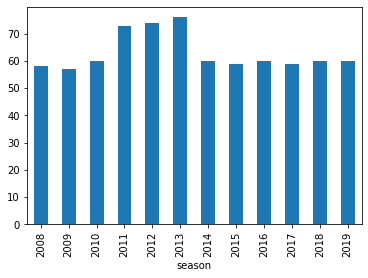

In [9]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [10]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [11]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

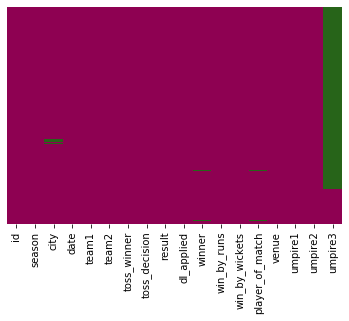

In [12]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [13]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [14]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

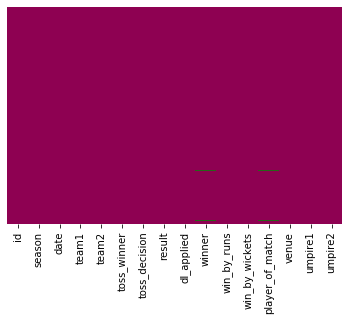

In [15]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Delhi capitals(DC) and Delhi Capitals(DC).so we only want information between the matches that had take place between them.

#  Delhi Dardevils Changed  to Delhi capitals in 2019 So need to change the title to Delhi Capitals

In [16]:
Matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [17]:
Matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [20]:
SRH_DC1=Matches.loc[(Matches['team1']=='Delhi Capitals')&(Matches['team2'] =='Sunrisers Hyderabad')]
SRH_DC1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
393,394,2013,Delhi,2013-04-12,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,2013-05-04,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
488,489,2014,Delhi,2014-05-10,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,NaN
530,531,2015,Visakhapatnam,2015-04-18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Delhi Capitals,4,0,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
671,7929,2018,Hyderabad,05/05/18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,7,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",Bruce Oxenford,O Nandan,Virender Kumar Sharma
677,7935,2018,Delhi,10/05/18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,Feroz Shah Kotla,C Shamshuddin,Anil Dandekar,S Ravi
711,11152,2019,Delhi,04/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,J Bairstow,Feroz Shah Kotla Ground,C Shamshuddin,KN Anantapadmanabhan,S Ravi
725,11321,2019,Hyderabad,14/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Delhi Capitals,39,0,K Paul,Rajiv Gandhi Intl. Cricket Stadium,Anil Chaudhary,Bruce Oxenford,Chris Gaffaney


In [21]:
SRH_DC2=Matches.loc[(Matches['team2']=='Delhi Capitals')&(Matches['team1'] =='Sunrisers Hyderabad')]

In [22]:
SRH_DC2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
560,561,2015,Raipur,2015-05-09,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,6,0,MC Henriques,Shaheed Veer Narayan Singh International Stadium,VA Kulkarni,S Ravi,NaN
617,618,2016,Hyderabad,2016-05-12,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,CH Morris,"Rajiv Gandhi International Stadium, Uppal",K Bharatan,M Erasmus,NaN
627,628,2016,Raipur,2016-05-20,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [23]:
SRH_DC=SRH_DC1.append(SRH_DC2)

In [24]:
SRH_DC

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
393,394,2013,Delhi,2013-04-12,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,2013-05-04,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
488,489,2014,Delhi,2014-05-10,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,NaN
530,531,2015,Visakhapatnam,2015-04-18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Delhi Capitals,4,0,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
671,7929,2018,Hyderabad,05/05/18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,7,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",Bruce Oxenford,O Nandan,Virender Kumar Sharma
677,7935,2018,Delhi,10/05/18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,Feroz Shah Kotla,C Shamshuddin,Anil Dandekar,S Ravi
711,11152,2019,Delhi,04/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,J Bairstow,Feroz Shah Kotla Ground,C Shamshuddin,KN Anantapadmanabhan,S Ravi
725,11321,2019,Hyderabad,14/04/19,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Delhi Capitals,39,0,K Paul,Rajiv Gandhi Intl. Cricket Stadium,Anil Chaudhary,Bruce Oxenford,Chris Gaffaney
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [25]:
SRH_DC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 393 to 753
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               15 non-null     int64 
 1   season           15 non-null     int64 
 2   city             14 non-null     object
 3   date             15 non-null     object
 4   team1            15 non-null     object
 5   team2            15 non-null     object
 6   toss_winner      15 non-null     object
 7   toss_decision    15 non-null     object
 8   result           15 non-null     object
 9   dl_applied       15 non-null     int64 
 10  winner           15 non-null     object
 11  win_by_runs      15 non-null     int64 
 12  win_by_wickets   15 non-null     int64 
 13  player_of_match  15 non-null     object
 14  venue            15 non-null     object
 15  umpire1          14 non-null     object
 16  umpire2          14 non-null     object
 17  umpire3          4 non-null      o

# # Complete details of matches that takes placed between SRH and DC

In [27]:
SRH_DC.describe

<bound method NDFrame.describe of         id  season           city        date                team1  \
393    394    2013          Delhi  2013-04-12       Delhi Capitals   
427    428    2013      Hyderabad  2013-05-04       Delhi Capitals   
488    489    2014          Delhi  2014-05-10       Delhi Capitals   
530    531    2015  Visakhapatnam  2015-04-18       Delhi Capitals   
671   7929    2018      Hyderabad    05/05/18       Delhi Capitals   
677   7935    2018          Delhi    10/05/18       Delhi Capitals   
711  11152    2019          Delhi    04/04/19       Delhi Capitals   
725  11321    2019      Hyderabad    14/04/19       Delhi Capitals   
20      21    2017      Hyderabad  2017-04-19  Sunrisers Hyderabad   
38      39    2017          Delhi  2017-05-02  Sunrisers Hyderabad   
468    469    2014            NaN  2014-04-25  Sunrisers Hyderabad   
560    561    2015         Raipur  2015-05-09  Sunrisers Hyderabad   
617    618    2016      Hyderabad  2016-05-12  Sunrisers

In [28]:
print("No of matches that takes place between KXIP and DC:",len(SRH_DC))

No of matches that takes place between KXIP and DC: 15


#  Below plot gives the details of the match that takes place between DC and SRH

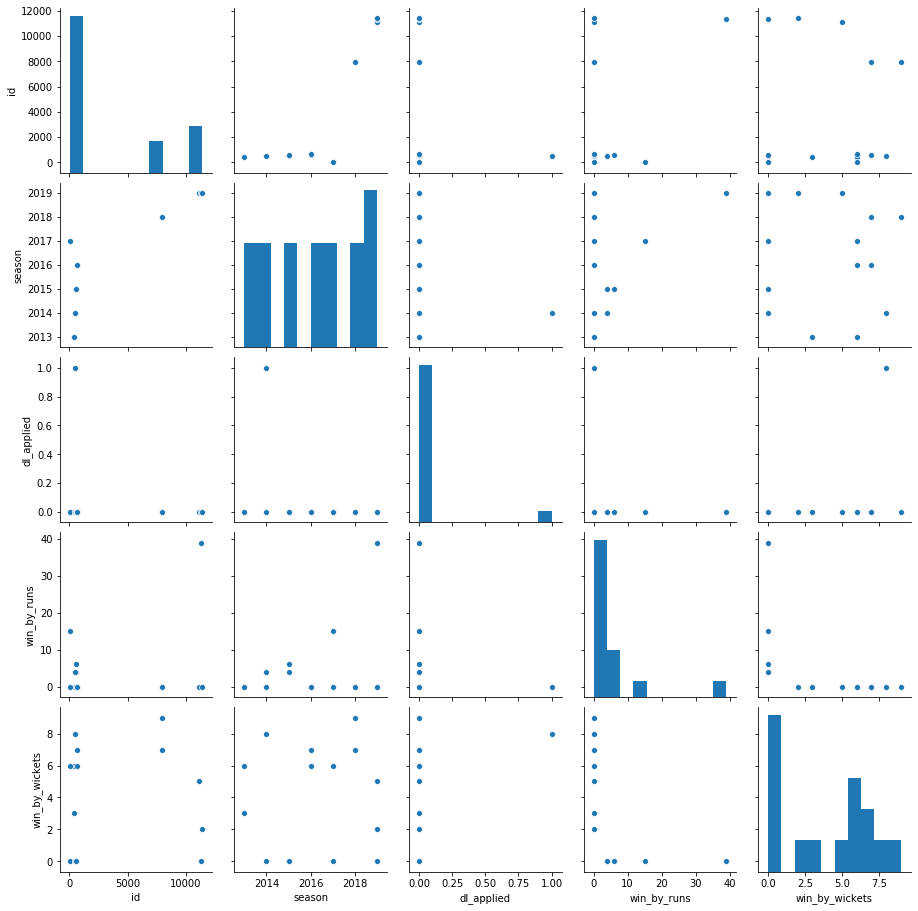

In [29]:
sns.pairplot(SRH_DC)

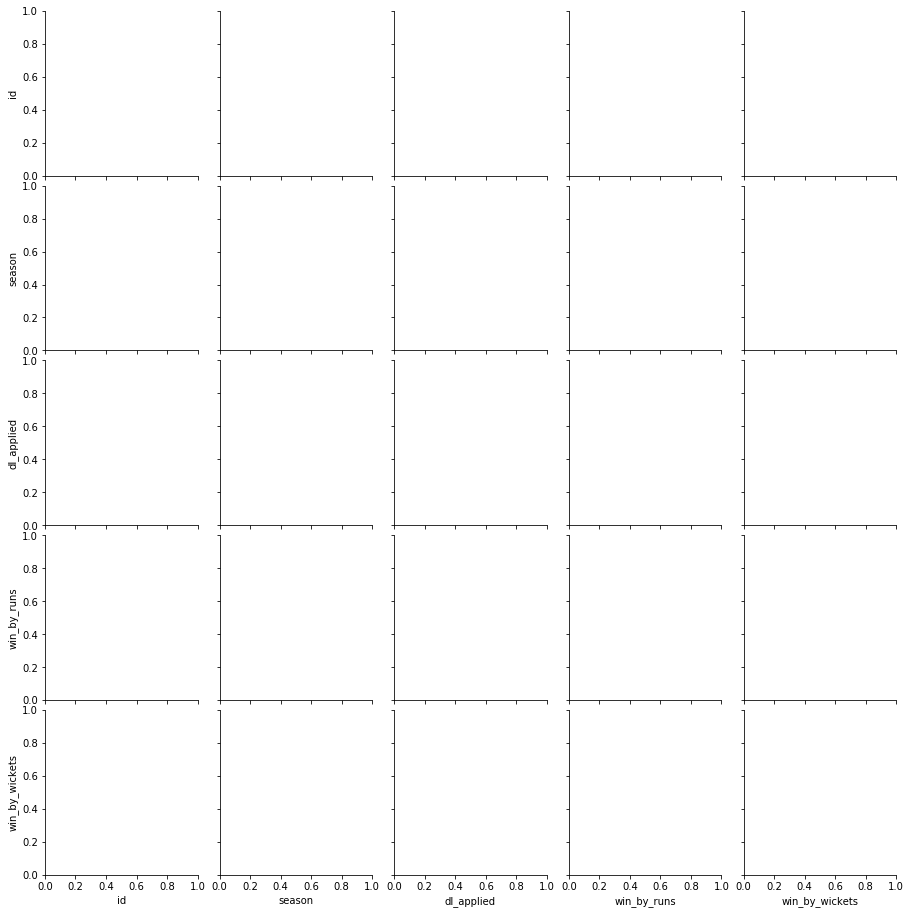

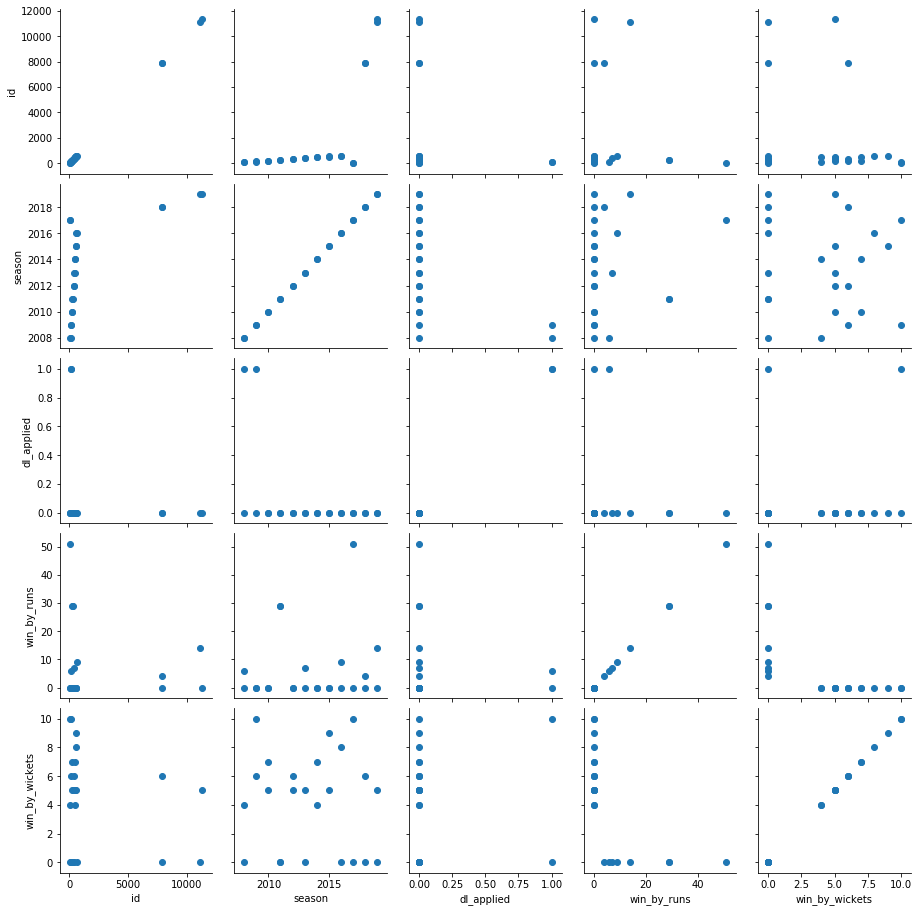

In [37]:
sns.PairGrid(SRH_DC)
g=sns.PairGrid(SRH_DC)
g.map(plt.scatter)

#  It looks like  DC won the Toss 9 Times and 6 Times SRH won the Toss

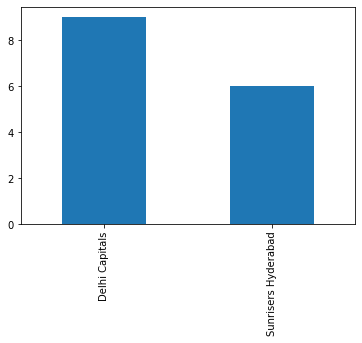

In [30]:
SRH_DC['toss_winner'].value_counts().plot(kind='bar')

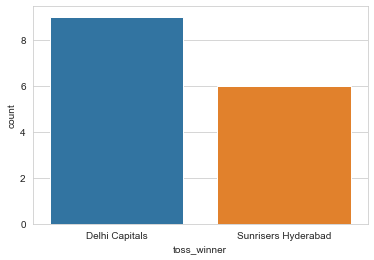

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=SRH_DC)

# DC went on to win the match 1 time by  batting first and 5 times by Batting Second against SRH .so total it is (DC=win-6,loss-9)whereas for SRH they wIn the match 7 times by batting first and win 2 times by batting Second against DC.so it is (SRH=win-9,loss=6)

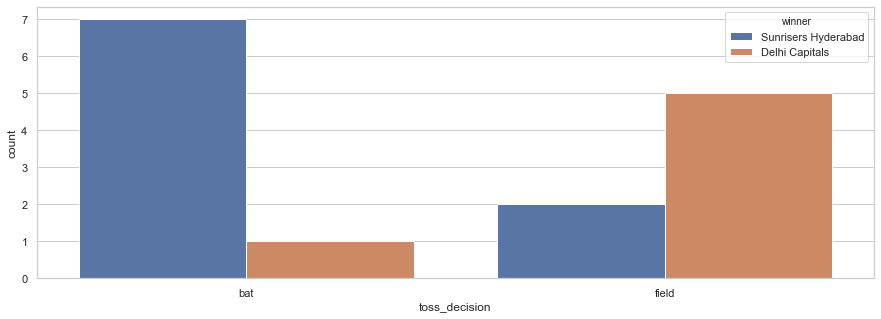

In [37]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=SRH_DC)

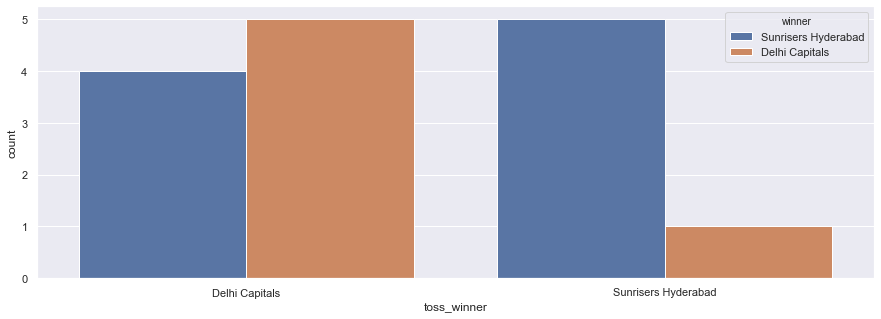

In [38]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=SRH_DC)

In [39]:
print("No of times toss win by both teams:")
SRH_DC['toss_winner'].value_counts()

No of times toss win by both teams:


Delhi Capitals         9
Sunrisers Hyderabad    6
Name: toss_winner, dtype: int64

In [40]:
print("SRH win 9 times and Delhi win 6 times from 15 matches")

SRH win 9 times and Delhi win 6 times from 15 matches


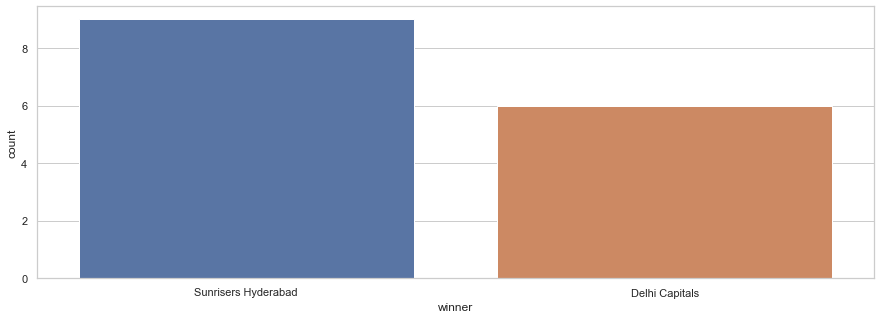

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=SRH_DC)

# correlation between Columns in Matches Dataset

In [42]:
SRH_DC.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.820285,-0.180610,0.296367,0.042048
season,0.820285,1.000000,-0.283767,0.322416,0.041778
dl_applied,-0.180610,-0.283767,1.000000,-0.120928,0.336018
win_by_runs,0.296367,0.322416,-0.120928,1.000000,-0.550222
win_by_wickets,0.042048,0.041778,0.336018,-0.550222,1.000000


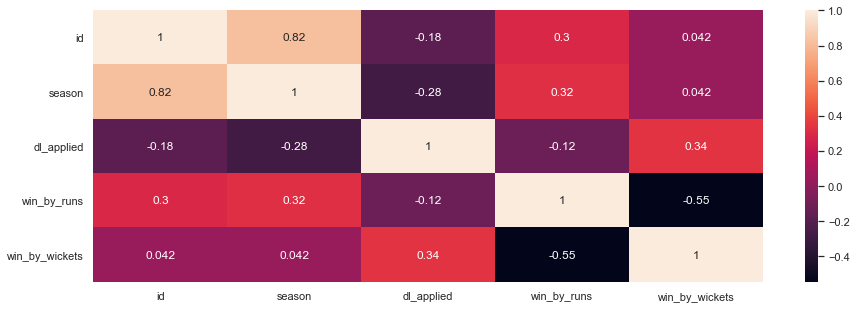

In [43]:
sns.heatmap(SRH_DC.corr(),yticklabels=True,annot=True)

In [45]:
SRH_DC['winner']=pd.get_dummies(SRH_DC['winner'])

In [46]:
SRH_DC.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
393,394,2013,Delhi,2013-04-12,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,0,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,2013-05-04,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,0,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN


# Using Sweetviz we can get details about the Matches

In [47]:
import sweetviz 
my_report=sweetviz.analyze([SRH_DC,'SRH_DC'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [48]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [49]:
Deliveries=pd.read_csv("deliveries.csv")

In [50]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [51]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [52]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Need To replace Delhi Dardevils with Delhi Capitals

In [53]:
Deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [54]:
Deliveries.tail(30)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179048,11415,2,Chennai Super Kings,Mumbai Indians,16,1,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
179049,11415,2,Chennai Super Kings,Mumbai Indians,16,2,DJ Bravo,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179050,11415,2,Chennai Super Kings,Mumbai Indians,16,3,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179051,11415,2,Chennai Super Kings,Mumbai Indians,16,4,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
179053,11415,2,Chennai Super Kings,Mumbai Indians,16,6,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179054,11415,2,Chennai Super Kings,Mumbai Indians,17,1,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179055,11415,2,Chennai Super Kings,Mumbai Indians,17,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179056,11415,2,Chennai Super Kings,Mumbai Indians,17,3,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
179057,11415,2,Chennai Super Kings,Mumbai Indians,17,4,SR Watson,DJ Bravo,JJ Bumrah,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Filtering the match details that only takes place between Delhi Capitals and  Sunrisers Hyderabad

In [66]:
Delhi_Hyderabad1=Deliveries.loc[(Deliveries['batting_team' ] =='Sunrisers Hyderabad' ) & (Deliveries['bowling_team'] == 'Delhi Capitals')]

In [67]:
Delhi_Hyderabad1         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


In [68]:
Delhi_Hyderabad2=Deliveries.loc[(Deliveries['bowling_team' ] =='Sunrisers Hyderabad' ) & (Deliveries['batting_team'] == 'Delhi Capitals')]

In [69]:
Delhi_Hyderabad2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4933,21,2,Delhi Capitals,Sunrisers Hyderabad,1,1,SV Samson,SW Billings,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4934,21,2,Delhi Capitals,Sunrisers Hyderabad,1,2,SV Samson,SW Billings,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
4935,21,2,Delhi Capitals,Sunrisers Hyderabad,1,3,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4936,21,2,Delhi Capitals,Sunrisers Hyderabad,1,4,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4937,21,2,Delhi Capitals,Sunrisers Hyderabad,1,5,SW Billings,SV Samson,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


In [70]:
Delhi_Hyderabad=Delhi_Hyderabad1.append(Delhi_Hyderabad2)

# Complete Details Of Delhi vs Hyderabad

In [71]:
Delhi_Hyderabad

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


# using Match_id we can summarize that 24 matches were played between SRH and DC

In [72]:
Delhi_Hyderabad['match_id'].value_counts()

11413    252
531      247
628      247
7929     246
469      245
21       245
561      244
394      243
11321    241
39       240
618      237
11152    236
7935     235
428      203
489      151
Name: match_id, dtype: int64

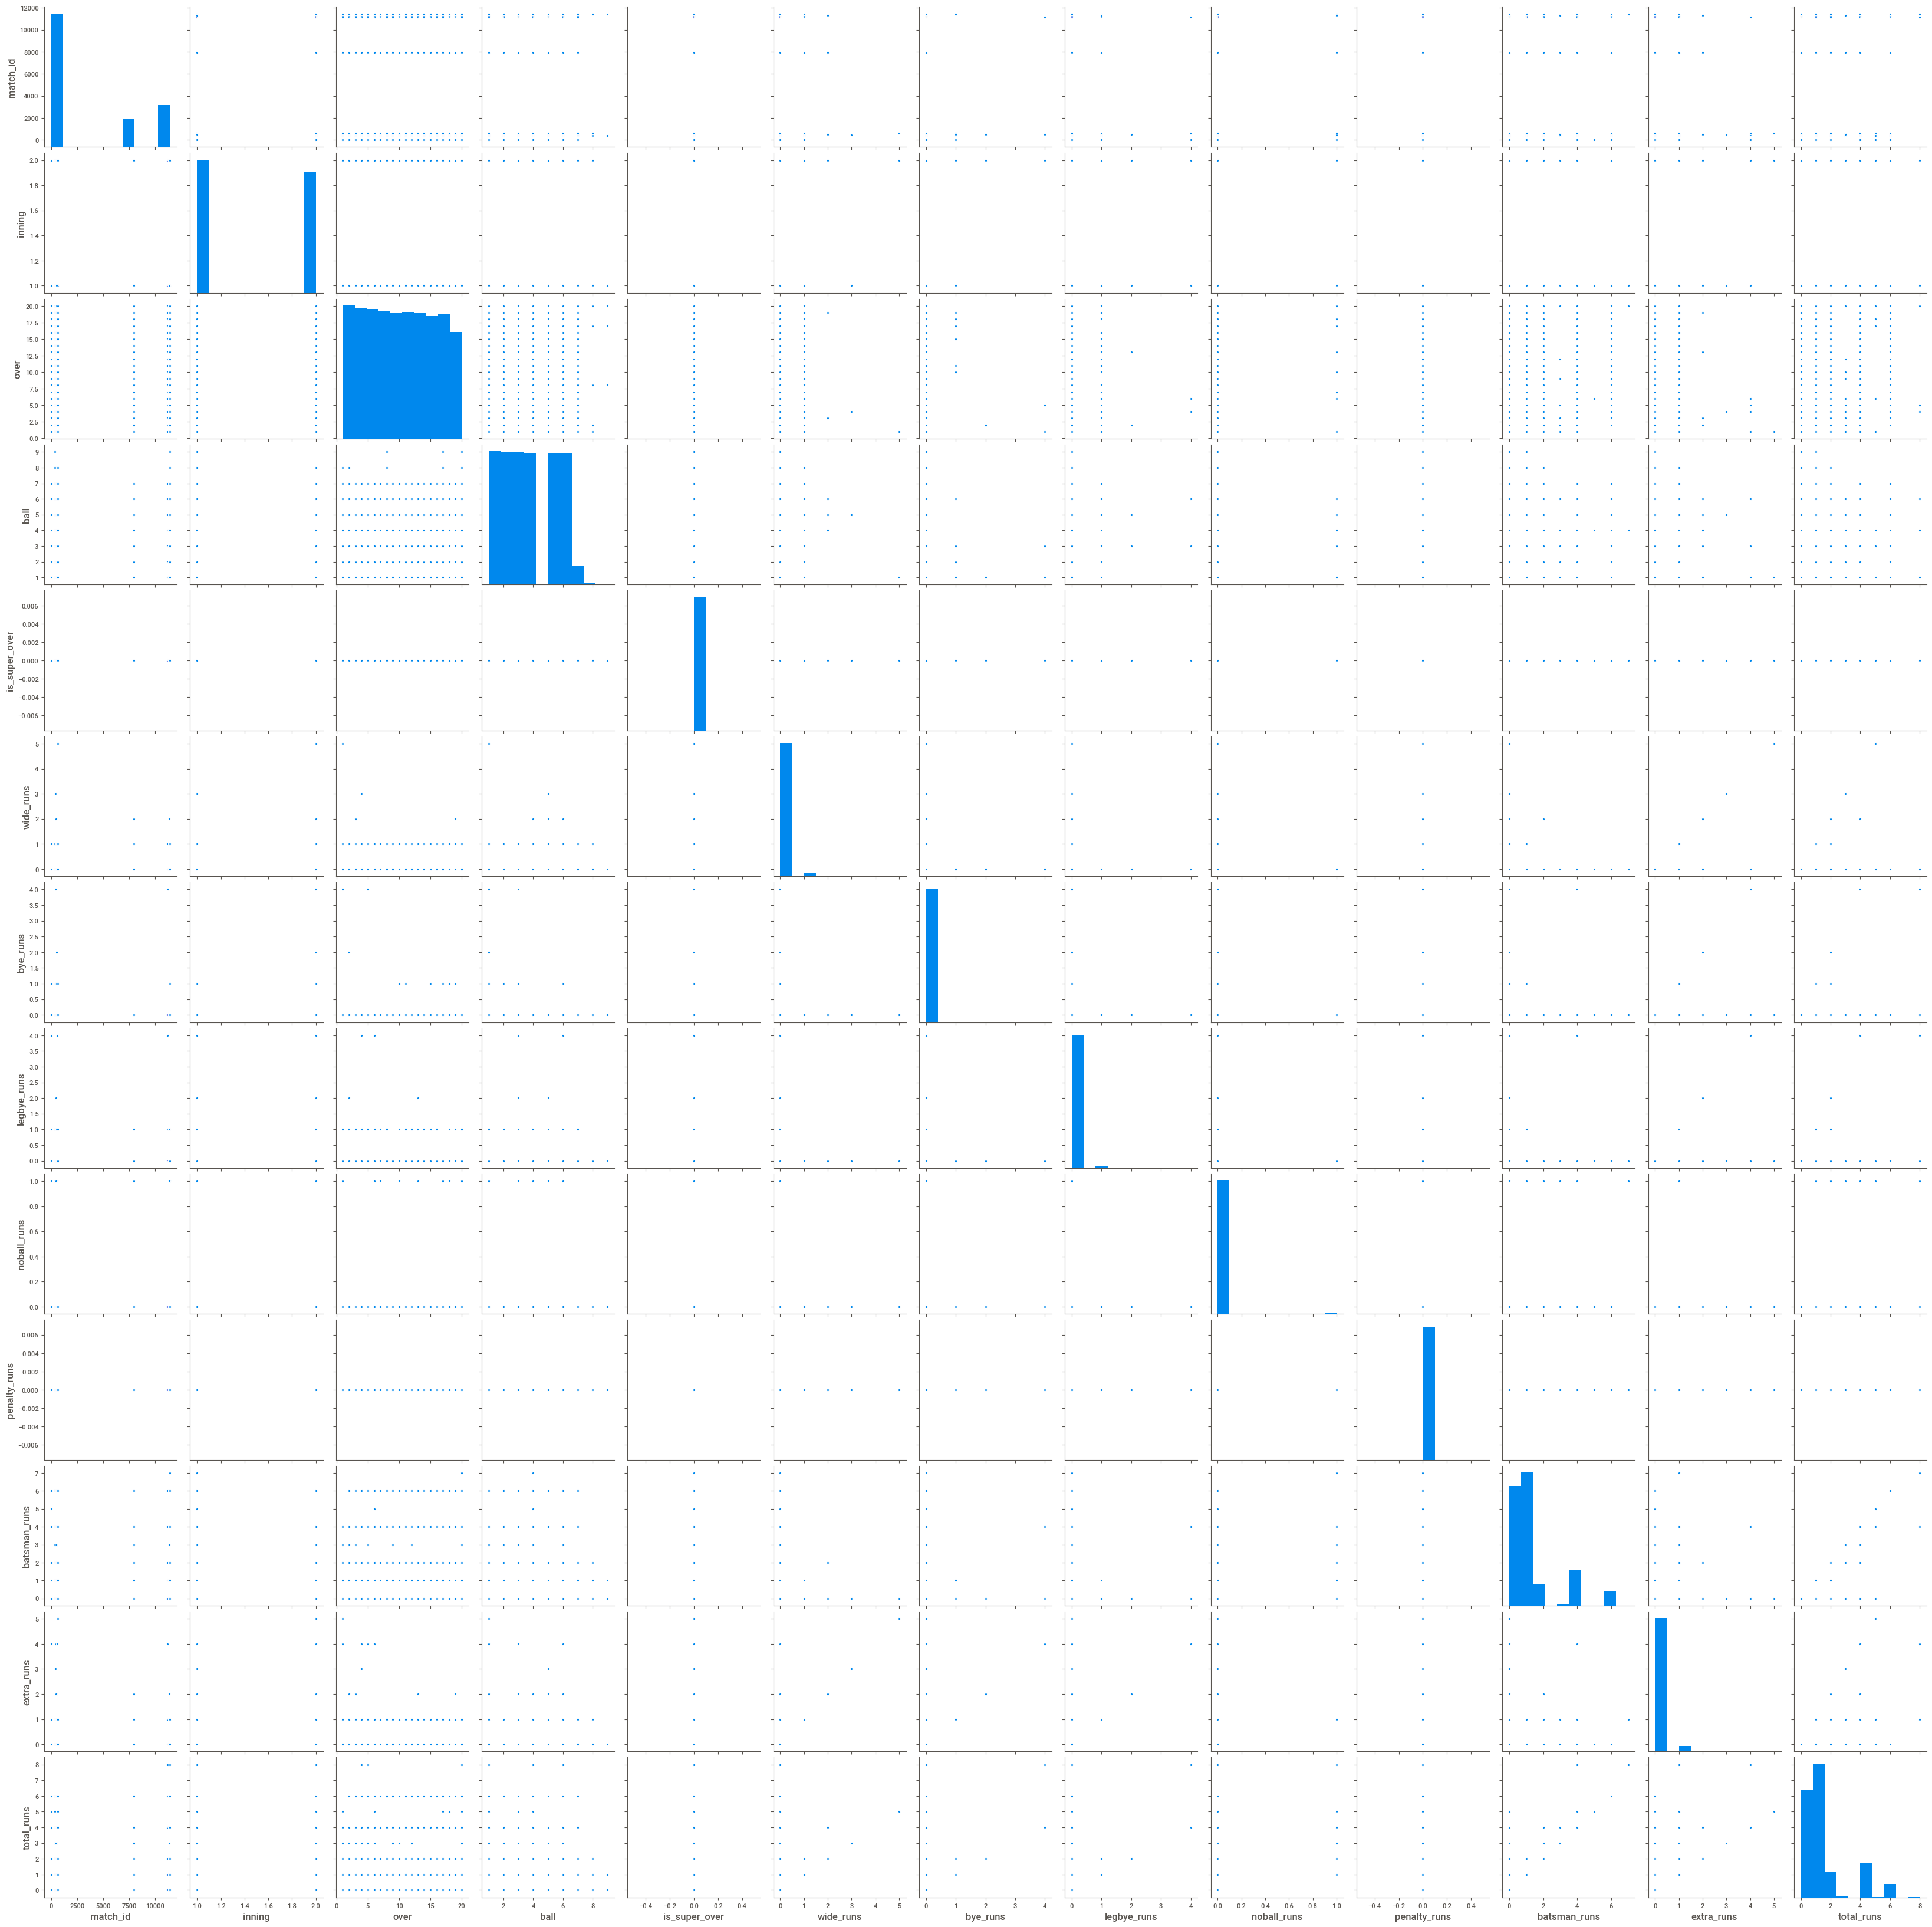

In [73]:
sns.pairplot(Delhi_Hyderabad)

# It is difficult to interpret covariance.Let's try correlation

In [75]:
Delhi_Hyderabad.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,2.154718e+07,45.805117,423.447028,41.443133,0.0,7.876628,-0.647197,-5.226715,-1.815862,0.0,46.250214,0.186854,46.437068
inning,4.580512e+01,0.249457,-0.139723,-0.004562,0.0,0.001461,0.001686,-0.001991,-0.000471,0.0,0.011037,0.000686,0.011723
over,4.234470e+02,-0.139723,32.640185,-0.026250,0.0,-0.020134,-0.013127,-0.015573,0.012712,0.0,0.806537,-0.036123,0.770414
ball,4.144313e+01,-0.004562,-0.026250,3.180869,0.0,0.006723,-0.004546,0.000073,-0.001482,0.0,0.018086,0.000767,0.018853
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,7.876628e+00,0.001461,-0.020134,0.006723,0.0,0.033009,-0.000119,-0.000425,-0.000098,0.0,-0.020649,0.032367,0.011718
bye_runs,-6.471975e-01,0.001686,-0.013127,-0.004546,0.0,-0.000119,0.012224,-0.000084,-0.000019,0.0,-0.001210,0.012002,0.010791
legbye_runs,-5.226715e+00,-0.001991,-0.015573,0.000073,0.0,-0.000425,-0.000084,0.028465,-0.000069,0.0,-0.013173,0.027886,0.014713
noball_runs,-1.815862e+00,-0.000471,0.012712,-0.001482,0.0,-0.000098,-0.000019,-0.000069,0.003972,0.0,0.003275,0.003785,0.007061
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [76]:
Delhi_Hyderabad.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.019757,0.015967,0.005006,NaN,0.009340,-0.001261,-0.006674,-0.006207,NaN,0.006362,0.000146,0.006371
inning,0.019757,1.000000,-0.048966,-0.005122,NaN,0.016103,0.030540,-0.023622,-0.014959,NaN,0.014109,0.004983,0.014948
over,0.015967,-0.048966,1.000000,-0.002576,NaN,-0.019398,-0.020783,-0.016156,0.035306,NaN,0.090136,-0.022929,0.085880
ball,0.005006,-0.005122,-0.002576,1.000000,NaN,0.020748,-0.023056,0.000241,-0.013187,NaN,0.006475,0.001560,0.006732
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,0.009340,0.016103,-0.019398,0.020748,NaN,1.000000,-0.005903,-0.013879,-0.008528,NaN,-0.072568,0.646052,0.041075
bye_runs,-0.001261,0.030540,-0.020783,-0.023056,NaN,-0.005903,1.000000,-0.004509,-0.002770,NaN,-0.006990,0.393660,0.062161
legbye_runs,-0.006674,-0.023622,-0.016156,0.000241,NaN,-0.013879,-0.004509,1.000000,-0.006514,NaN,-0.049851,0.599392,0.055539
noball_runs,-0.006207,-0.014959,0.035306,-0.013187,NaN,-0.008528,-0.002770,-0.006514,1.000000,NaN,0.033185,0.217823,0.071354
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

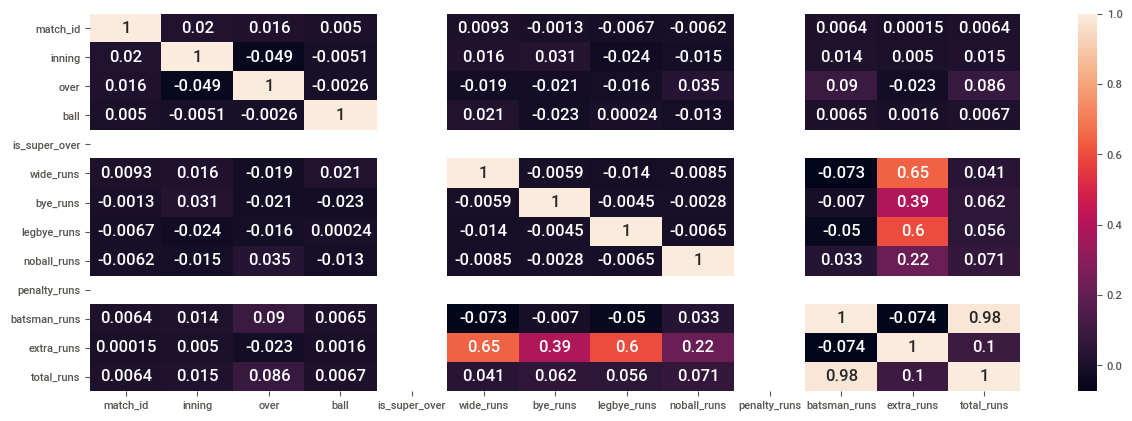

In [77]:
sns.heatmap(Delhi_Hyderabad.corr(),yticklabels=True,annot=True)

In [78]:
Delhi_Hyderabad.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,3512.000000,3512.000000,3512.000000,3512.000000,3512.0,3512.000000,3512.000000,3512.000000,3512.000000,3512.0,3512.000000,3512.000000,3512.000000
mean,3703.606492,1.475228,10.240604,3.585991,0.0,0.024487,0.004841,0.017369,0.003986,0.0,1.250000,0.050683,1.300683
std,4641.893560,0.499457,5.713159,1.783499,0.0,0.181683,0.110561,0.168716,0.063020,0.0,1.566207,0.275755,1.570201
min,21.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,428.000000,1.000000,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,561.000000,1.000000,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,7935.000000,2.000000,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,11413.000000,2.000000,20.000000,9.000000,0.0,5.000000,4.000000,4.000000,1.000000,0.0,7.000000,5.000000,8.000000


In [79]:
Delhi_Hyderabad

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,...,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN


# How many wickets ll Rashid Khan take in this match?

In [81]:
Rashid_Khan_wickets= Delhi_Hyderabad.loc[(Delhi_Hyderabad['bowler']=='Rashid Khan')]

In [82]:
len(Rashid_Khan_wickets['match_id'].value_counts())

7

In [83]:
Rashid_Khan_wickets['dismissal_kind'].value_counts()

run out    2
lbw        2
bowled     2
caught     2
Name: dismissal_kind, dtype: int64

In [86]:
print("Average wickets taken by Rashid Khan in a single match against Delhi Capitals",6/7)

Average wickets taken by Rashid Khan in a single match against Delhi Capitals 0.8571428571428571


In [87]:
print("Average wickets taken by Rashid Khan in a single match against Delhi Capitals 0-1")

Average wickets taken by Rashid Khan in a single match against Delhi Capitals 0-1


# How many Runs ll david Warner score in his last seven balls?

In [88]:
David_Warner_Runs_in_last_seven_Balls=Delhi_Hyderabad.loc[(Delhi_Hyderabad['batsman']=='DA Warner')]

In [89]:
David_Warner_Runs=David_Warner_Runs_in_last_seven_Balls.loc[(David_Warner_Runs_in_last_seven_Balls['noball_runs']==0)&(David_Warner_Runs_in_last_seven_Balls['wide_runs']==0)]

In [90]:
David_Warner_Runs.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [93]:
len(David_Warner_Runs['match_id'].value_counts())

12

In [91]:
match_id=David_Warner_Runs['match_id']
runs=David_Warner_Runs['batsman_runs']
for i,j in zip(match_id,runs):
    print(i,j)

21 0
21 1
21 1
21 1
21 0
21 0
39 0
39 4
39 0
39 0
39 0
39 0
39 0
39 0
39 4
39 2
39 0
39 0
39 6
39 1
39 1
39 2
39 4
39 1
39 1
39 4
39 0
469 0
469 0
469 1
469 1
469 6
469 0
469 1
469 0
469 0
469 1
469 1
469 0
469 1
469 0
469 0
469 1
469 1
469 1
469 1
469 0
469 2
469 0
469 0
469 0
469 0
469 0
469 0
469 4
469 2
469 2
469 1
469 4
469 1
469 1
469 6
469 1
469 2
469 1
469 6
469 1
469 2
469 0
469 4
469 1
469 1
489 0
489 2
489 1
489 1
489 1
489 1
489 4
489 1
489 1
531 0
531 0
531 0
531 1
531 0
531 1
531 0
531 1
531 2
531 1
531 2
531 2
531 0
531 4
531 0
531 4
531 4
531 2
531 4
531 0
561 1
561 0
561 4
561 1
561 0
561 0
561 0
561 3
561 0
561 0
561 6
561 0
561 1
561 1
561 0
618 1
618 1
618 0
618 2
618 0
618 0
618 1
618 1
618 4
618 4
618 1
618 4
618 4
618 6
618 0
618 1
618 1
618 1
618 1
618 1
618 2
618 0
618 4
618 0
618 0
618 1
618 0
618 1
618 4
618 0
628 0
628 0
628 0
628 1
628 0
628 0
628 0
628 4
628 4
628 1
628 1
628 0
628 1
628 4
628 2
628 4
628 0
628 1
628 0
628 2
628 4
628 4
628 0
628 0
628 0
6

In [95]:
print("In match_id_21 David Warner only faced 6 balls")
print("In match_id_39 David Warner scored 13 runs in his last seven balls")
print("In match_id_469 David Warner scored 15 runs in his last seven balls")
print("In match_id_489 David Warner scored 10 runs in his last seven balls")
print("In match_id_531 David Warner scored 18 runs in his last seven balls")
print("In match_id_561 David Warner scored 8 runs in his last seven balls")
print("In match_id_618 David Warner scored 6 runs in his last seven balls")
print("In match_id_628 David Warner scored 8 runs in his last seven balls")
print("In match_id_11152 David Warner scored 4 runs in his last seven balls")
print("In match_id_11321 David Warner scored 6 runs in his last seven balls")
print("In match_id_394 David Warner only faced 4 balls")
print("In match_id_428 David Warner scored 3 runs in his last seven balls")

In match_id_21 David Warner only faced 6 balls
In match_id_39 David Warner scored 13 runs in his last seven balls
In match_id_469 David Warner scored 15 runs in his last seven balls
In match_id_489 David Warner scored 10 runs in his last seven balls
In match_id_531 David Warner scored 18 runs in his last seven balls
In match_id_561 David Warner scored 8 runs in his last seven balls
In match_id_618 David Warner scored 6 runs in his last seven balls
In match_id_628 David Warner scored 8 runs in his last seven balls
In match_id_11152 David Warner scored 4 runs in his last seven balls
In match_id_11321 David Warner scored 6 runs in his last seven balls
In match_id_394 David Warner only faced 4 balls
In match_id_428 David Warner scored 3 runs in his last seven balls


In [98]:
print("Average Runs scored by David Warner in his last seven balls against DC in 12 matches:",(13+15+10+18+8+6+8+4+6+3)//10)

Average Runs scored by David Warner in his last seven balls against DC in 12 matches: 9


# How many balls more/less ll DC take to score 20 runs after reaching 30runs as compared to SRH?

In [ ]:
DC_take_to_score_20_runs=Delhi_Hyderabad2.loc[(Delhi_Hyderabad2['over']<=19)]

In [ ]:
DC_take_to_score_20_runs.groupby('match_id').sum()

In [101]:
len(Delhi_Hyderabad2['match_id'].value_counts())

15

In [127]:
print('In match_id 21 DC took 10 balls to score 20 runs after scoring 30 runs')
print('In match_id 39 DC took 9 balls to score 20 runs after scoring 30 runs')
print('In match_id 394 DC took 28 balls to score 20 runs after scoring 30 runs')
print('In match_id 428 DC took 27 balls to score 20 runs after scoring 30 runs')
print('In match_id 469 DC took 13 balls to score 20 runs after scoring 30 runs')
print('In match_id 489 DC took 10 balls to score 20 runs after scoring 30 runs')
print('In match_id 531 DC took 16 balls to score 20 runs after scoring 30 runs')
print('In match_id 561 DC took 12 balls to score 20 runs after scoring 30 runs')
print('In match_id 618 DC took 12 balls to score 20 runs after scoring 30 runs')
print('In match_id 628 DC took 16 balls to score 20 runs after scoring 30 runs')
print('In match_id 7928 DC took 10 balls to score 20 runs after scoring 30 runs')
print('In match_id 7935 DC took 28 balls to score 20 runs after scoring 30 runs')
print('In match_id 11152 DC took 22 balls to score 20 runs after scoring 30 runs')
print('In match_id 11321 DC took 12 balls to score 20 runs after scoring 30 runs')
print('In match_id 11413 DC took 12 balls to score 20 runs after scoring 30 runs')

In match_id 21 DC took 10 balls to score 20 runs after scoring 30 runs
In match_id 39 DC took 9 balls to score 20 runs after scoring 30 runs
In match_id 394 DC took 28 balls to score 20 runs after scoring 30 runs
In match_id 428 DC took 27 balls to score 20 runs after scoring 30 runs
In match_id 469 DC took 13 balls to score 20 runs after scoring 30 runs
In match_id 489 DC took 10 balls to score 20 runs after scoring 30 runs
In match_id 531 DC took 16 balls to score 20 runs after scoring 30 runs
In match_id 561 DC took 12 balls to score 20 runs after scoring 30 runs
In match_id 618 DC took 12 balls to score 20 runs after scoring 30 runs
In match_id 628 DC took 16 balls to score 20 runs after scoring 30 runs
In match_id 7928 DC took 10 balls to score 20 runs after scoring 30 runs
In match_id 7935 DC took 28 balls to score 20 runs after scoring 30 runs
In match_id 11152 DC took 22 balls to score 20 runs after scoring 30 runs
In match_id 11321 DC took 12 balls to score 20 runs after scori

In [128]:
print("Average Balls Taken by DC to score 20 runs after scoring 30 runs",(10+9+28+27+13+10+16+12+12+16+10+28+22+12+12)//15)

Average Balls Taken by DC to score 20 runs after scoring 30 runs 15


In [140]:
SRH_take_to_score_20_runs=Delhi_Hyderabad1.loc[(Delhi_Hyderabad1['over']<=19)]
SRH_take_to_score_20_runs.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
21,117,1161,420,0,1,0,1,2,0,170,4,174
39,116,1171,413,0,2,0,5,0,0,159,7,166
394,232,1158,413,0,1,0,1,1,0,106,3,109
428,172,648,308,0,3,0,0,0,0,78,3,81
469,116,1143,413,0,2,0,3,0,0,169,5,174
489,60,78,116,0,4,4,2,1,0,33,11,44
531,230,1142,406,0,1,2,1,0,0,154,4,158
561,117,1168,420,0,3,0,1,0,0,148,4,152
618,118,1185,427,0,3,0,6,1,0,128,10,138


In [141]:
print('In match_id 21 SRH took 10 balls to score 20 runs after scoring 30 runs')
print('In match_id 39 SRH took 8 balls to score 20 runs after scoring 30 runs')
print('In match_id 394 SRH took 26 balls to score 20 runs after scoring 30 runs')
print('In match_id 428 SRH took 30 balls to score 20 runs after scoring 30 runs')
print('In match_id 469 SRH took 12 balls to score 20 runs after scoring 30 runs')
print('******************In match_id 489 SRH total score was only 44 runs**************************')
print('In match_id 531 SRH took 6 balls to score 20 runs after scoring 30 runs')
print('In match_id 561 SRH took 20 balls to score 20 runs after scoring 30 runs')
print('In match_id 618 SRH took 10 balls to score 20 runs after scoring 30 runs')
print('In match_id 628 SRH took 19 balls to score 20 runs after scoring 30 runs')
print('In match_id 7928 SRH took 9 balls to score 20 runs after scoring 30 runs')
print('In match_id 7935 SRH took 12 balls to score 20 runs after scoring 30 runs')
print('In match_id 11152 SRH took 9 balls to score 20 runs after scoring 30 runs')
print('In match_id 11321 SRH took 24 balls to score 20 runs after scoring 30 runs')
print('In match_id 11413 SRH took 18 balls to score 20 runs after scoring 30 runs')

In match_id 21 SRH took 10 balls to score 20 runs after scoring 30 runs
In match_id 39 SRH took 8 balls to score 20 runs after scoring 30 runs
In match_id 394 SRH took 26 balls to score 20 runs after scoring 30 runs
In match_id 428 SRH took 30 balls to score 20 runs after scoring 30 runs
In match_id 469 SRH took 12 balls to score 20 runs after scoring 30 runs
******************In match_id 489 SRH total score was only 44 runs**************************
In match_id 531 SRH took 6 balls to score 20 runs after scoring 30 runs
In match_id 561 SRH took 20 balls to score 20 runs after scoring 30 runs
In match_id 618 SRH took 10 balls to score 20 runs after scoring 30 runs
In match_id 628 SRH took 19 balls to score 20 runs after scoring 30 runs
In match_id 7928 SRH took 9 balls to score 20 runs after scoring 30 runs
In match_id 7935 SRH took 12 balls to score 20 runs after scoring 30 runs
In match_id 11152 SRH took 9 balls to score 20 runs after scoring 30 runs
In match_id 11321 SRH took 24 bal

In [145]:
print("Average Balls Taken by SRH to score 20 runs after scoring 30 runs",(10+8+26+30+12+6+20+10+19+9+12+9+24+18)//15)

Average Balls Taken by SRH to score 20 runs after scoring 30 runs 14


In [143]:
print("Average Balls Taken by DC to score 20 runs after scoring 30 runs",(10+9+28+27+13+10+16+12+12+16+10+28+22+12+12)//15)

Average Balls Taken by DC to score 20 runs after scoring 30 runs 15


# Which Batsman ll score the most boundaries in the match?

# David_warner_boundaries

In [146]:
David_warner_boundaries=Delhi_Hyderabad.loc[(Delhi_Hyderabad['batsman']=='DA Warner')]

In [147]:
David_warner_boundaries['batsman_runs'].value_counts()

0    114
1    110
4     31
2     28
6      8
3      1
Name: batsman_runs, dtype: int64

In [148]:
len(David_warner_boundaries['match_id'].value_counts())

12

In [149]:
print("Average Boundaries hit by David Warner in a single match",39//12)

Average Boundaries hit by David Warner in a single match 3


# Rishab_Pant_boundaries 

In [155]:
Rishab_Pant_boundaries=Delhi_Hyderabad.loc[(Delhi_Hyderabad['batsman']=='RR Pant')]

In [156]:
Rishab_Pant_boundaries['batsman_runs'].value_counts()

1    95
0    55
4    30
6    16
2    11
Name: batsman_runs, dtype: int64

In [157]:
len(Rishab_Pant_boundaries['match_id'].value_counts())

9

In [159]:
print("Average Boundaries hit by Rishab_Pant in a single match",46//9)

Average Boundaries hit by Rishab_Pant in a single match 5


# Shikhar_Dhawan_boundaries

In [160]:
Shikhar_Dhawan_boundaries=Delhi_Hyderabad.loc[(Delhi_Hyderabad['batsman']=='S Dhawan')]

In [161]:
Shikhar_Dhawan_boundaries['batsman_runs'].value_counts()

1    128
0    109
4     47
2     14
6      8
3      2
Name: batsman_runs, dtype: int64

In [162]:
len(Shikhar_Dhawan_boundaries['match_id'].value_counts())

14

In [164]:
print("Average Boundaries hit by Shikhar_Dhawan in a single match",55//14)

Average Boundaries hit by Shikhar_Dhawan in a single match 3


# Manish_Pandey_boundaries

In [165]:
Manish_Pandey_boundaries=Delhi_Hyderabad.loc[(Delhi_Hyderabad['batsman']=='MK Pandey')]

In [166]:
Manish_Pandey_boundaries['batsman_runs'].value_counts()

1    35
0    24
4     5
2     5
Name: batsman_runs, dtype: int64

In [167]:
len(Manish_Pandey_boundaries['match_id'].value_counts())

3

In [169]:
print("Average Boundaries hit by Manish_Pandey in a single match",5//3)

Average Boundaries hit by Manish_Pandey in a single match 1


# Shreyas_Iyer_boundaries

In [170]:
Shreyas_Iyer_boundaries=Delhi_Hyderabad.loc[(Delhi_Hyderabad['batsman']=='SS Iyer')]

In [171]:
Shreyas_Iyer_boundaries['batsman_runs'].value_counts()

1    105
0     92
4     21
2     14
6     12
Name: batsman_runs, dtype: int64

In [172]:
len(Shreyas_Iyer_boundaries['match_id'].value_counts())

9

In [174]:
print("Average Boundaries hit by Shreyas_Iyer in a single match",33//9)

Average Boundaries hit by Shreyas_Iyer in a single match 3


# Kane_Williamson_boundaries

In [175]:
Kane_Williamson_boundaries=Delhi_Hyderabad.loc[(Delhi_Hyderabad['batsman']=='KS Williamson')]

In [176]:
Kane_Williamson_boundaries['batsman_runs'].value_counts()

1    107
0     64
2     21
4     20
6      9
5      1
Name: batsman_runs, dtype: int64

In [177]:
len(Kane_Williamson_boundaries['match_id'].value_counts())

7

In [179]:
print("Average Boundaries hit by Kane_Williamson in a single match",29//7)

Average Boundaries hit by Kane_Williamson in a single match 4
